<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week2/Secondhanddataset_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Week 2 Deep Learning 🚀🚀**

---



##**Model PyTorch dan TensorFlow untuk secondhanddataset.csv 🍿**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving secondhanddataset.csv to secondhanddataset.csv


##**Install dan import Library🔖**


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

##**Load & PreProcessing Dataset🔎**

In [3]:
df = pd.read_csv("secondhanddataset.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [5]:
pd.set_option('display.max_columns', None)
print(df.head())

   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


In [6]:
# Drop unnecessary column
df = df.drop(columns=["v.id"])

In [7]:
# Define features and target
X = df.drop(columns=["current price"]).values
y = df["current price"].values

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Normalisasi target (current price)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [11]:
# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##**Model dengan PyTorch🍳**

In [12]:
# PyTorch MLP Model
class MLP_PyTorch(nn.Module):
    def __init__(self):
        super(MLP_PyTorch, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 256),
            nn.BatchNorm1d(256),  # Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.2),  # Dropout lebih kecil

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

#inisialisasi model baru
model_torch = MLP_PyTorch()
criterion = nn.MSELoss()
optimizer = optim.AdamW(model_torch.parameters(), lr=0.0005)  # AdamW optimizer

In [13]:
# Training Loop
# Training ulang
epochs = 300
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/300], Loss: 0.0965
Epoch [40/300], Loss: 0.0598
Epoch [60/300], Loss: 0.0478
Epoch [80/300], Loss: 0.0407
Epoch [100/300], Loss: 0.0385
Epoch [120/300], Loss: 0.0301
Epoch [140/300], Loss: 0.0289
Epoch [160/300], Loss: 0.0277
Epoch [180/300], Loss: 0.0242
Epoch [200/300], Loss: 0.0235
Epoch [220/300], Loss: 0.0228
Epoch [240/300], Loss: 0.0268
Epoch [260/300], Loss: 0.0238
Epoch [280/300], Loss: 0.0218
Epoch [300/300], Loss: 0.0200


In [14]:
# Prediksi dengan PyTorch
y_pred_torch = model_torch(X_test_torch).detach().numpy()

# Inverse transform hasil prediksi agar sesuai skala asli
y_pred_torch = scaler_y.inverse_transform(y_pred_torch)
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik evaluasi
mse_torch = mean_squared_error(y_test_real, y_pred_torch)
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test_real, y_pred_torch)

print(f'PyTorch - MSE: {mse_torch:.4f}, RMSE: {rmse_torch:.4f}, R²: {r2_torch:.4f}')


PyTorch - MSE: 412579179.8076, RMSE: 20312.0452, R²: 0.9755


#**Model dengan Tensorflow🥨**

In [15]:
# Model TensorFlow (Keras) dengan tuning
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1)
])


# Compile model dengan learning rate lebih kecil
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005)
model_tf.compile(optimizer=optimizer, loss='mse')

# Training ulang dengan batch size lebih besar
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model_tf.fit(X_train, y_train, epochs=300, batch_size=64,
                        validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 2.2273 - val_loss: 0.8006
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0046 - val_loss: 0.8219
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8910 - val_loss: 0.8424
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5953 - val_loss: 0.7948
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5403 - val_loss: 0.7712
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5232 - val_loss: 0.7553
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4699 - val_loss: 0.7063
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4250 - val_loss: 0.6928
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3354 - val_loss: 0.6653
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3690 - val_loss: 0.6504
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2870 - val_loss: 0.6039
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss

In [16]:
# Prediksi dengan TensorFlow
y_pred_tf = model_tf.predict(X_test)

# Inverse transform hasil prediksi
y_pred_tf = scaler_y.inverse_transform(y_pred_tf)
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik evaluasi
mse_tf = mean_squared_error(y_test_real, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test_real, y_pred_tf)

print(f'TensorFlow - MSE: {mse_tf:.4f}, RMSE: {rmse_tf:.4f}, R²: {r2_tf:.4f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
TensorFlow - MSE: 101133745.9796, RMSE: 10056.5275, R²: 0.9940


#**Visualisasi📊**

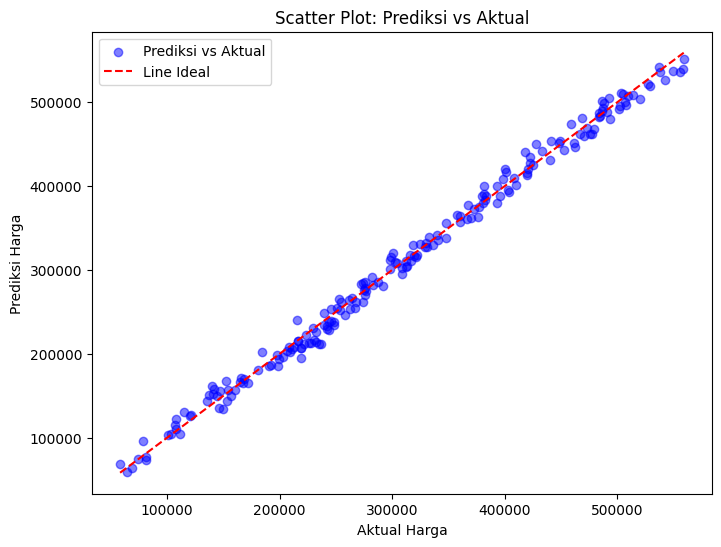

In [18]:
# Scatter Plot: Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_tf, color='blue', alpha=0.5, label='Prediksi vs Aktual')
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red', linestyle='--', label='Line Ideal')
plt.xlabel('Aktual Harga')
plt.ylabel('Prediksi Harga')
plt.title('Scatter Plot: Prediksi vs Aktual')
plt.legend()
plt.show()


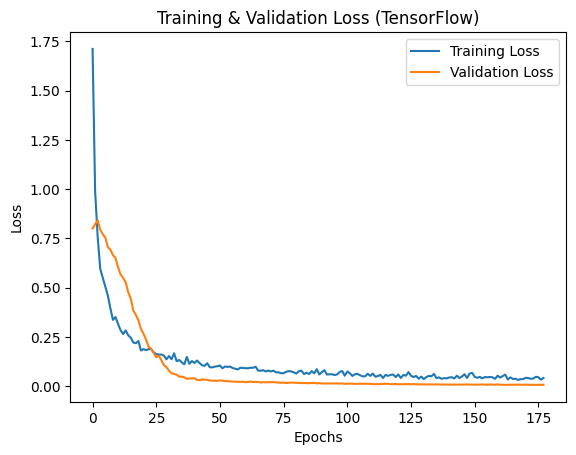

In [19]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss (TensorFlow)')
plt.show()


##**Penjelasan SIngkat Mengenai Evaluasi Model**

1️⃣ MSE (Mean Squared Error) – Seberapa Besar Errornya?

MSE menghitung rata-rata dari selisih kuadrat antara nilai aktual dan prediksi.

🔹 Semakin kecil MSE, semakin baik modelnya.

🔹 Satuan error dalam kuadrat, jadi sulit diinterpretasikan langsung.

Formula:

*MSE* = *1/n ∑(y actual - y pred)²*

2️⃣ RMSE (Root Mean Squared Error) – Error dalam Satuan Asli

RMSE adalah akar dari MSE, sehingga mengembalikan error dalam satuan asli dari data.

🔹 Lebih mudah diinterpretasikan dibanding MSE.

🔹 Semakin kecil RMSE, semakin baik modelnya.

Formula:

*RMSE* = *√MSE*

3️⃣ R² (Koefisien Determinasi)
Seberapa Baik Modelnya?

R² mengukur seberapa baik model menjelaskan variabilitas data.

🔹 R² = 1 → Model sempurna (Prediksi 100% akurat).

🔹 R² = 0 → Model sama buruknya dengan rata-rata data.

🔹 R² < 0 → Model lebih buruk dari tebakan rata-rata.

Formula:

*R² =  1 - ∑(y actual - y pred)²/ ∑(y actual - y mean)²*


Kesimpulan hasil evaluasi model :  

✅ PyTorch → R² = 0.9768

✅ TensorFlow → R² = 0.9968

R² makin mendekati 1.0 artinya model menjelaskan hampir semua variasi harga mobil bekas.

Tensorflow masih  lebih unggul dari PyTorch dengan nilai yang hampir sempurna